## Importación de Librerias

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Definición de Ruta dataset

In [5]:
% mkdir "01. Dataset"

In [11]:
% ls -lhtr '01. Dataset'

total 16M
-rw-r--r-- 1 root root 3.0K Jun 26 20:37 labels_bankruptcy.csv
-rw-r--r-- 1 root root  12M Jun 26 20:37 dataset_normalizado.csv
-rw-r--r-- 1 root root 4.0M Jun 26 20:39 dataset.csv


In [7]:
orig_dir = os.getcwd()
os.chdir("..")
os.chdir('01. Dataset')
dsets_files = glob.glob('*.csv')
for fil in dsets_files:
    if fil == 'labels_bankruptcy.csv': 
        f_labels = os.path.abspath(fil)
    if fil == 'dataset_normalizado.csv':
        f_data = os.path.abspath(fil)
os.chdir(orig_dir)

In [12]:
% ls -lhtr '01. Dataset'

total 17M
-rw-r--r-- 1 root root 3.0K Jun 26 20:37 labels_bankruptcy.csv
-rw-r--r-- 1 root root  12M Jun 26 20:37 dataset_normalizado.csv
-rw-r--r-- 1 root root 5.1M Jun 26 20:39 dataset.csv


## Dataset y etiquetas, lectura y comprensión

In [ ]:
df_col = pd.read_csv(f_labels, sep=' ',names=['codes','Names'])
names_to_codes = dict(zip(df_col['Names'],df_col['codes'])) # this will serve later for brevity
codes_to_names = dict(zip(df_col['codes'],df_col['Names']))
cols = ['flag'] # add flag column
cols = cols + list(df_col['Names'])
df = pd.read_csv(f_data, encoding = "cp1252", names=cols, skiprows=1)
df.head(5)

,flag,Cost_of_Interest-bearing_Debt,Cash_Reinvestment_Ratio,Current_Ratio,Acid_Test,Interest_Expenses/Total_Revenue,Total_Liability/Equity_Ratio,Liability/Total_Assets,Interest-bearing_Debt/Equity,Contingent_Liability/Equity,...,CFO_to_Assets,Cash_Flow_to_Equity,Realized_Gross_Profit_Growth_Rate,Operating_Income_Growth,Net_Income_Growth,Continuing_Operating_Income_after_Tax_Growth,Net_Income-Excluding_Disposal_Gain_or_Loss_Growth,Total_Asset_Growth,Total_Equity_Growth,Return_on_Total_Asset_Growth
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Estadísticas y Gráficos

In [ ]:
def save_figure(fig,path,name):
  fname = os.path.join('results',path,name)
  with PdfPages(fname) as pdf:
    pdf.savefig(fig)

**Seaborn plots, distribuciones (resultados en carpeta /results)**

In [ ]:
width = 14
height = 14

plt.style.use("default")


figures = np.array([None]*6)
axes = np.array([None]*6)
for i in range(6):
  figures[i], axes[i] = plt.subplots(nrows=4, ncols=4, figsize=(width, height))

k = 0
columns = df.columns
for i in range(6):
  for axe in axes[i].flatten():
    sns.distplot(df[columns[k]], ax=axe)
    k = k + 1
  plt.tight_layout()
  save_figure(figures[i],'.','distri_{}_{}.pdf'.format(i*16,(i+1)*16))
  figures[i].clf()

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

**Correlación de variables**

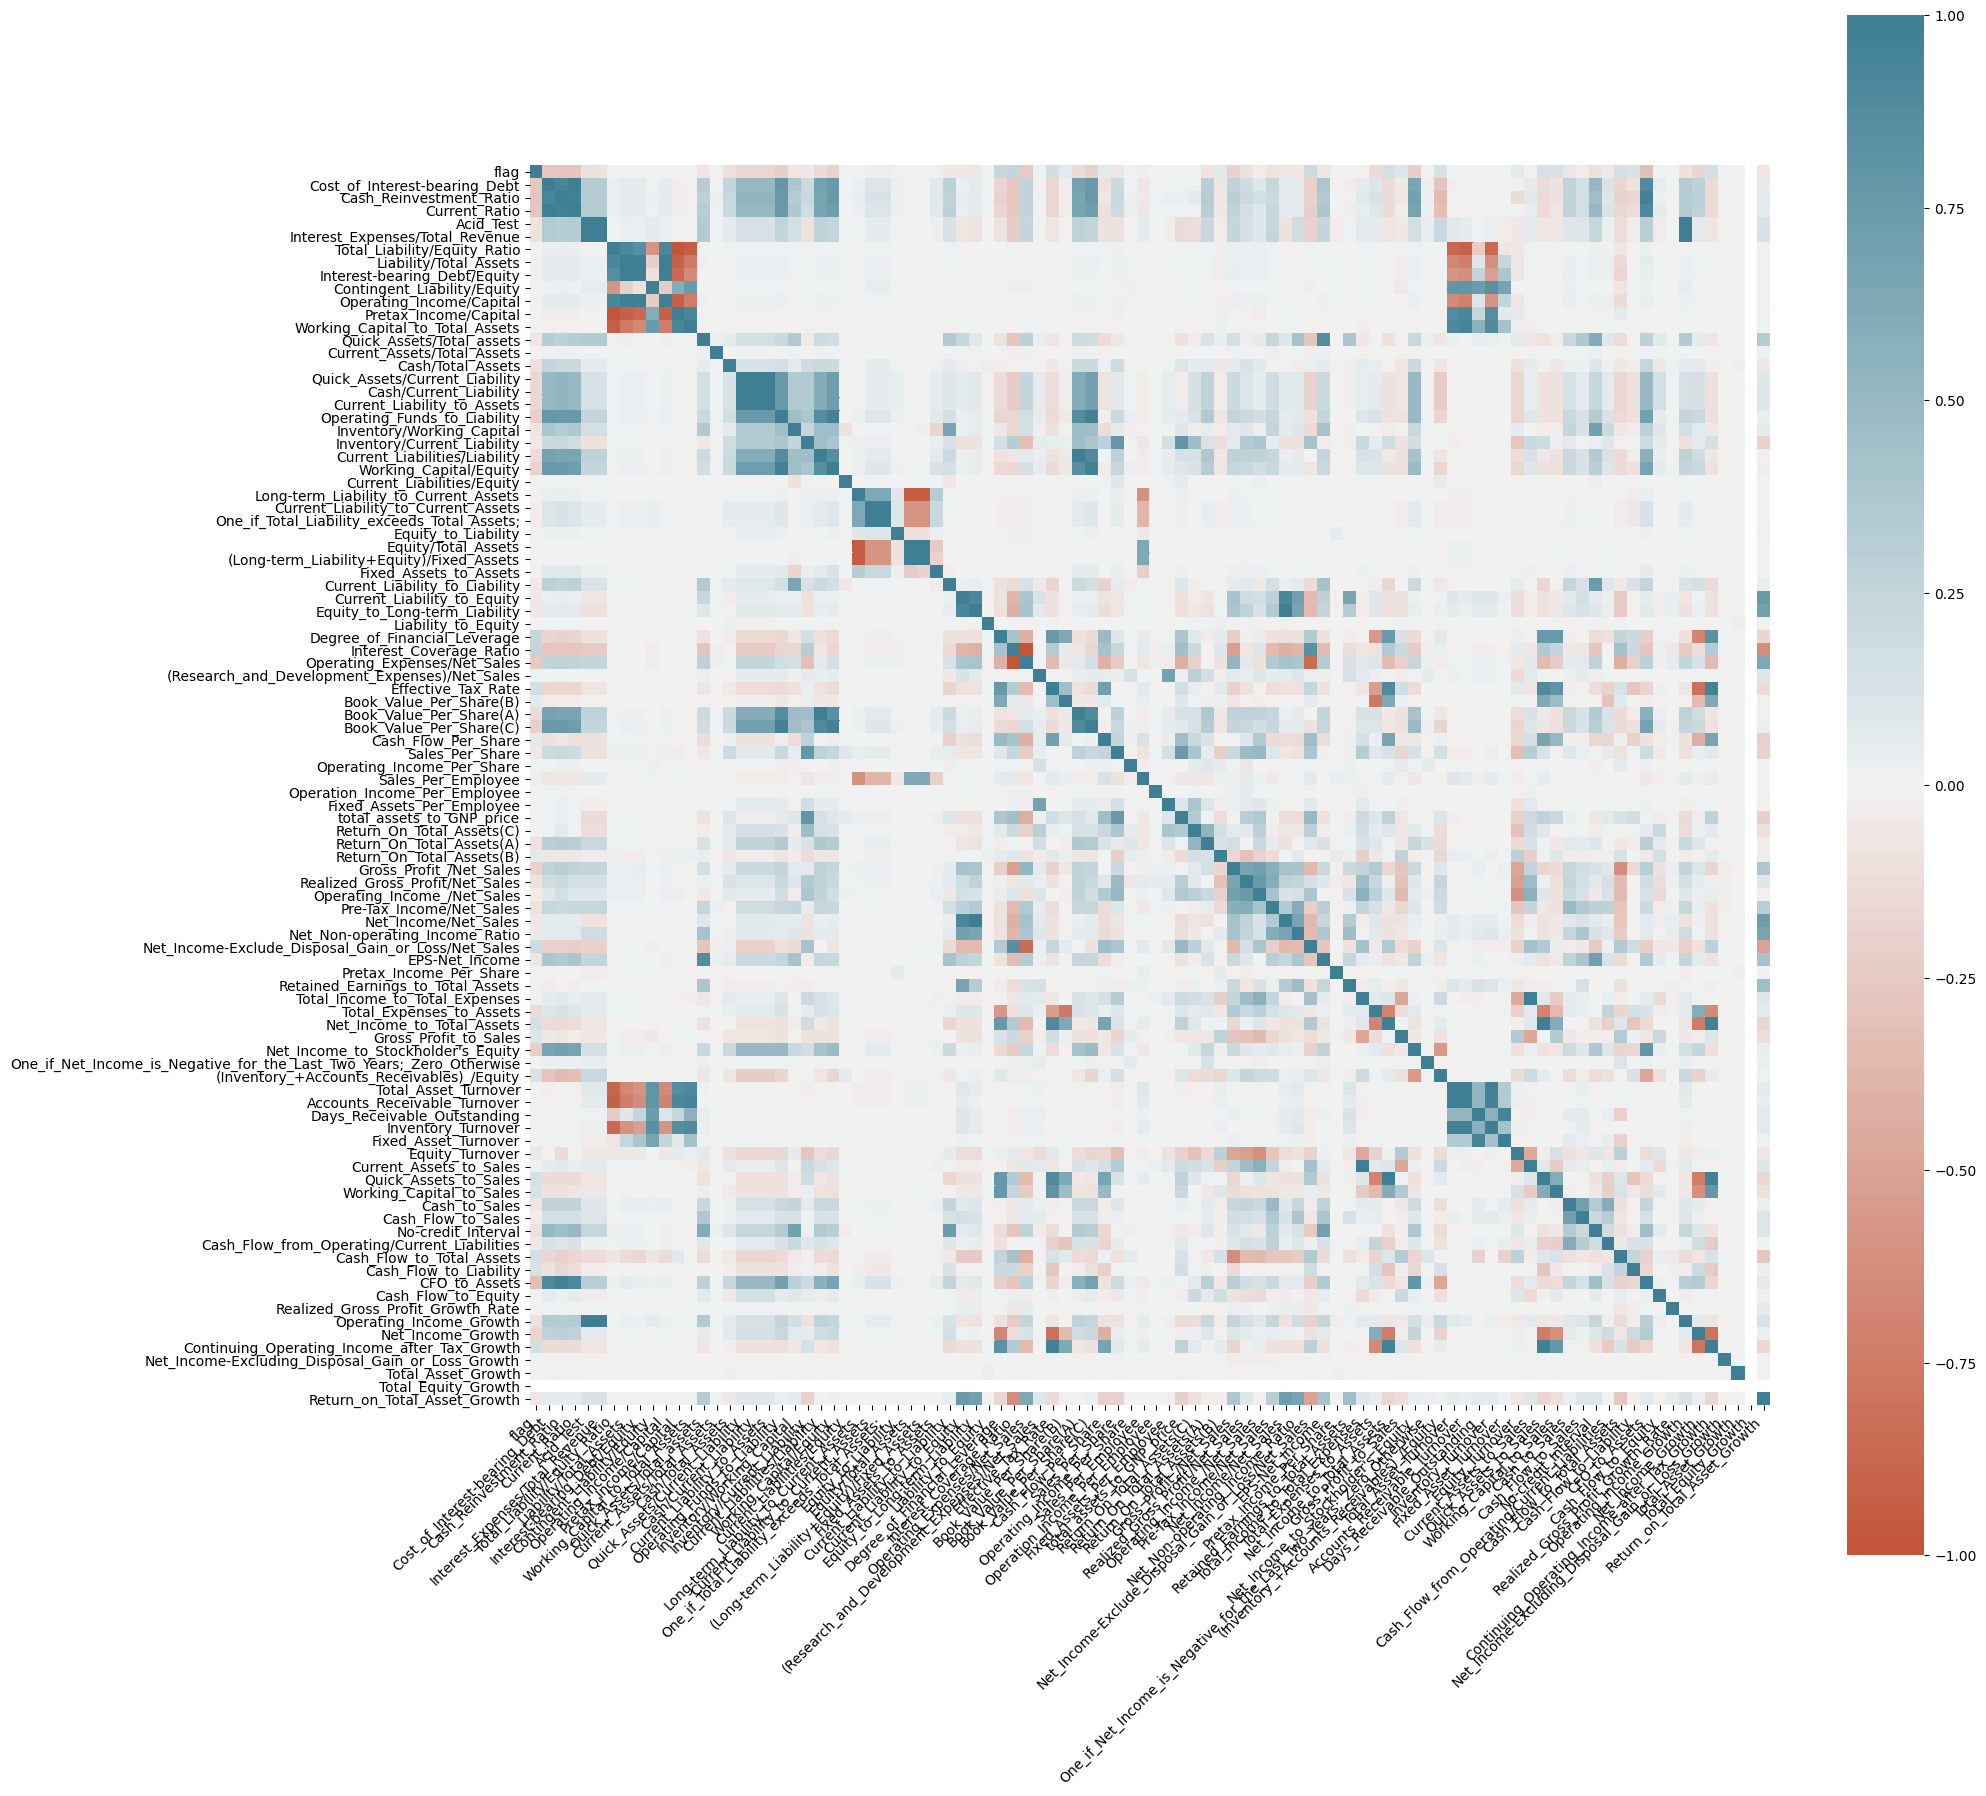

In [ ]:
# se observa en la gráfica de correlaciones, que Total equity brown no es relevante
corr = df.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    yticklabels=list(df.columns),
    xticklabels=list(df.columns),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
save_figure(fig,'.','correlations.pdf')

**Características del dataframe**


In [ ]:
df.describe() # notar que Total equity grown es siempre 1

,flag,Cost_of_Interest-bearing_Debt,Cash_Reinvestment_Ratio,Current_Ratio,Acid_Test,Interest_Expenses/Total_Revenue,Total_Liability/Equity_Ratio,Liability/Total_Assets,Interest-bearing_Debt/Equity,Contingent_Liability/Equity,...,CFO_to_Assets,Cash_Flow_to_Equity,Realized_Gross_Profit_Growth_Rate,Operating_Income_Growth,Net_Income_Growth,Continuing_Operating_Income_after_Tax_Growth,Net_Income-Excluding_Disposal_Gain_or_Loss_Growth,Total_Asset_Growth,Total_Equity_Growth,Return_on_Total_Asset_Growth
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,0.008639,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,0.033920,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,0.000890,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,0.002066,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,0.005219,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


**Class count**

In [ ]:
df['flag'].value_counts() # cuentas por categía, muestra que está desbalanceado

0    6599
1     220
Name: flag, dtype: int64